1. Read the file

In [2]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/ramdeveloper1985/datascience/master/Train_BigMartSales.csv")
df.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier 1   
3                       1998         NaN               Tier 3   
4                       1987        High               Tier 3   

         Outlet_Type  Item_Outlet_Sales  
0  Supermarket Type1          3735.1380  
1  Supermarket Type2           443.4228  
2  Supermarket Type1          2097.2700  
3      Grocery Store           732.3800  
4  Supermarket Type1           994.7052

In [0]:
df.isnull().sum()
#missing values in Item_weight and Outlet_size needs to be imputed
mean = df['Item_Weight'].mean() #imputing item_weight with mean
df['Item_Weight'].fillna(mean, inplace =True)

mode = df['Outlet_Size'].mode() #imputing outlet size with mode
df['Outlet_Size'].fillna(mode[0], inplace =True)

In [0]:
df.drop(['Item_Identifier', 'Outlet_Identifier'], axis=1, inplace=True)
df = pd.get_dummies(df)

In [0]:
from sklearn.model_selection import train_test_split
train , test = train_test_split(df, test_size = 0.3)

x_train = train.drop('Item_Outlet_Sales', axis=1)
y_train = train['Item_Outlet_Sales']

x_test = test.drop('Item_Outlet_Sales', axis = 1)
y_test = test['Item_Outlet_Sales']

In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)

x_test_scaled = scaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test_scaled)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [0]:
#import required packages
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(x_train, y_train)  #fit the model
    pred=model.predict(x_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 1549.9734411904758
RMSE value for k=  2 is: 1349.6694233763653
RMSE value for k=  3 is: 1296.724070552761
RMSE value for k=  4 is: 1264.488628155787
RMSE value for k=  5 is: 1249.9375430089397
RMSE value for k=  6 is: 1246.8154982092565
RMSE value for k=  7 is: 1237.8645899202115
RMSE value for k=  8 is: 1237.858290756091
RMSE value for k=  9 is: 1232.3369105211414
RMSE value for k=  10 is: 1237.1710620586675
RMSE value for k=  11 is: 1236.547332495065
RMSE value for k=  12 is: 1235.7770178077994
RMSE value for k=  13 is: 1238.2027783844408
RMSE value for k=  14 is: 1242.6692761277593
RMSE value for k=  15 is: 1248.0800960130193
RMSE value for k=  16 is: 1253.4177855101434
RMSE value for k=  17 is: 1257.7960025704008
RMSE value for k=  18 is: 1263.1204108586355
RMSE value for k=  19 is: 1266.74330275335
RMSE value for k=  20 is: 1271.5165552352607


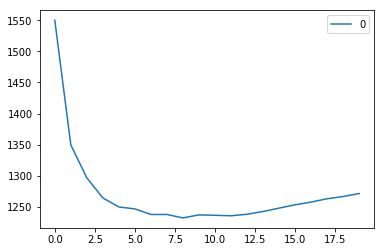

In [9]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

when we take k=1, we get a very high RMSE value. The RMSE value decreases as we increase the k value. At k= 8, the RMSE is approximately 1237.85, and shoots up on further increasing the k value. We can safely say that k=8 will give us the best result in this case


Implementing GridsearchCV 
For deciding the value of k, plotting the elbow curve every time is be a cumbersome and tedious process.  **use gridsearch to find the best value**.

In [9]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}

knn = neighbors.KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)
model.fit(x_train,y_train)
model.best_params_

{'n_neighbors': 8}

In [11]:
k=8
model = neighbors.KNeighborsRegressor(n_neighbors = k)
model.fit(x_train, y_train)  #fit the model
pred=model.predict(x_test) #make prediction on test set
rmse = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
print('RMSE value for k= ' , k , 'is:', rmse)

RMSE value for k=  8 is: 1241.3909407184512
